<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logisticka regresija

Logisticka regersija predstavlja vrstu regresije kod koje se predvidja verovatnoca da se neki dogadjaj desio ili ne na osnovu nezavisnih promenjivih.
Formula logisticke regresije glasi
\begin{equation}
σ(x) = \frac{1}{1 + e^{-({\beta_0 + \beta_1x}) } }
\end{equation}

Funkcija $σ$ ima svojstvo da joj je domen skup $\mathbb{R}$ a kodomen interval $(0,1)$

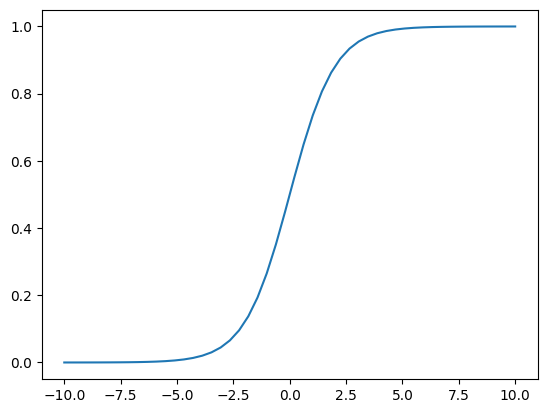

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sigmoid = lambda x, b0, b1 : 1 / (1 + np.e ** -(b0 + b1*x))
x = np.linspace(-10,10)
y = sigmoid(x, 0, 1)
sns.lineplot(x=x, y=y)
plt.show()

## Kako parametri $β_0$ i $β_1$ utiču na logističku krivu

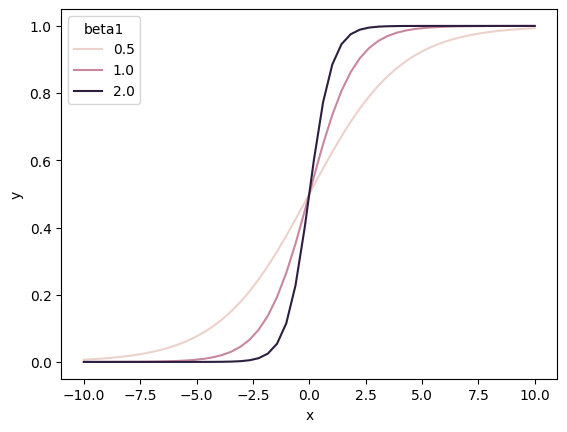

In [38]:
import pandas as pd
vals = [0.5, 1, 2]
df = pd.DataFrame({"x" : [], "y" : [], "beta1" : []})
for b1 in vals:
  y = sigmoid(x, 0, b1)
  data = pd.DataFrame.from_dict({"x" : x, "y" : y, "beta1" : b1})
  df = pd.concat([df, data])

sns.lineplot(df, x='x', y='y', hue='beta1')
plt.show()

Sa grafika iznad se može videti da $β_1$ utiče na strmost logističke krive. Veće vrednosti povećavaju strmost i istovremeno smanjuju interval na $x$ osi gde funkcija nije sigurna kako da klasifikuje slucajeve.  

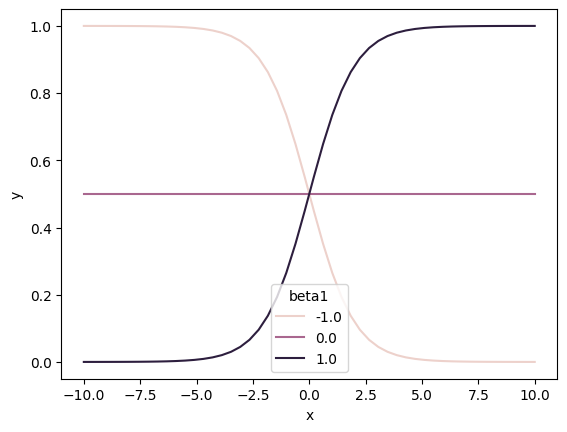

In [44]:
vals = [-1, 0, 1]
df = pd.DataFrame({"x" : [], "y" : [], "beta1" : []})
for b1 in vals:
  y = sigmoid(x, 0, b1)
  data = pd.DataFrame.from_dict({"x" : x, "y" : y, "beta1" : b1})
  df = pd.concat([df, data])

sns.lineplot(df, x='x', y='y', hue='beta1')
plt.show()

Ukoliko je $\beta_1$ negativno, onda logisticka kriva ima suprotnu orijentaciju.

<Axes: xlabel='x', ylabel='y'>

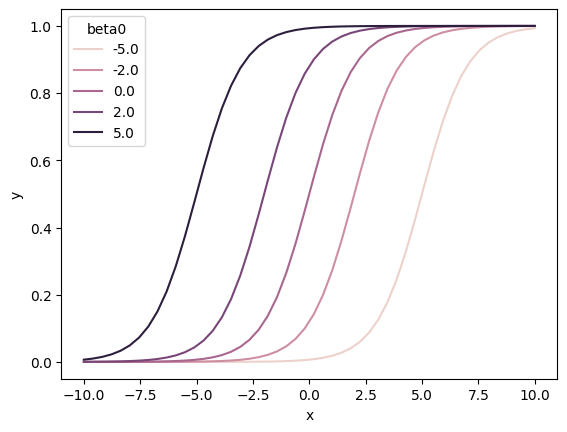

In [43]:
vals = [-5, -2, 0, 2, 5]
df = pd.DataFrame({"x" : [], "y" : [], "beta0" : []})
for b0 in vals:
  y = sigmoid(x, b0, 1)
  data = pd.DataFrame.from_dict({"x" : x, "y" : y, "beta0" : b0})
  df = pd.concat([df, data])

sns.lineplot(df, x='x', y='y', hue='beta0')

Parametar $\beta_0$ pomera vrednost gde je nesigurnost modela maksimalna (tacku na $x$ osi gde je $y=0.5$) za -$\beta_0$.

## Sinteticki podaci


In [87]:
import sklearn.datasets as skd
import pandas as pd
data = skd.make_classification(n_samples=200, n_classes=2, n_clusters_per_class=1, n_features=1,n_informative=1, n_redundant=0, n_repeated=0)
x = data[0]
y = data[1]

df = pd.DataFrame(data[0])
df['y'] = y

df.rename(columns={0: "x0"}, inplace=True)

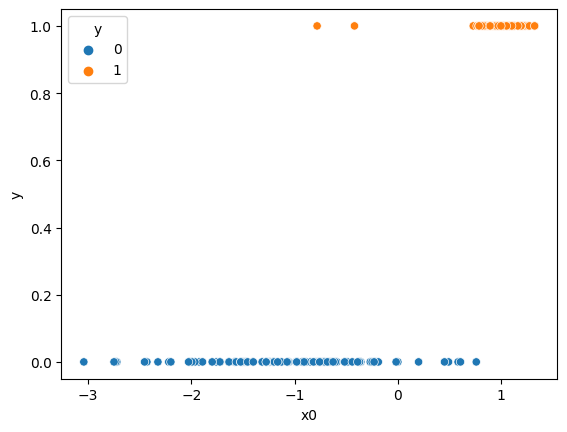

In [88]:
sns.scatterplot(df, x='x0', y='y', hue='y')
plt.show()